In [110]:
## bibliotecas necessarias
import librosa 
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Audio # play audio, funciona apenas no jupyter
import pyaudio
import wave
import PySimpleGUI as sg

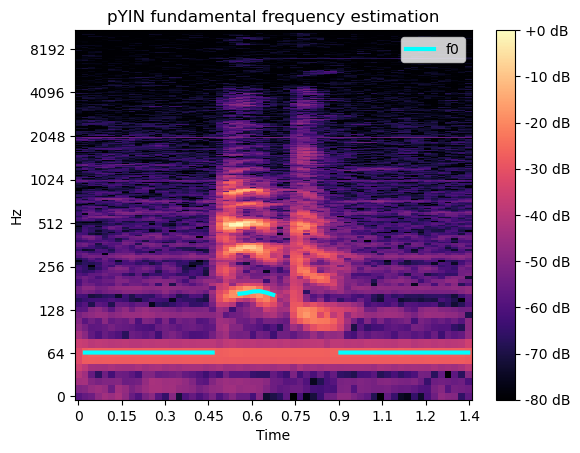

In [111]:
# lendo arquivo exemplo
filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Base2/audio_24.wav'
sr = 22000
y, sr = librosa.load(filename, sr=sr)
Audio(data=y, rate=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

times = librosa.times_like(f0)

# plot do espectro ao longo do tempo e destaque na F0

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [112]:
# array para tirar uma media da freq. f0 do usuário
m0_arr = []

# lendo os arquivos em sequencia
for i in range(1,50):
    filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Base2/audio_{i}.wav'
    sr = 22000 # taxa de amostragem para ler o audio
    y, sr = librosa.load(filename, sr=sr)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

    m0 = np.nanmean(f0) # calculando a f0 media para cada audio
    m0_arr.append(m0) # salvando no array

In [113]:
m0_arr = np.array(m0_arr) # transformando em numpy array

In [114]:
m0 = np.round(m0_arr.mean(), 2) # calculando media de f0 para todos os usuário (estimando oa f0 do usuário)
s0 = np.round(m0_arr.std(), 2) # calculando o desvio das amostras
print(m0, s0)

80.64 8.68


In [148]:
import speech_recognition as sr
a = sr.Recognizer()
print("Say the secret word...")
with sr.Microphone() as source:
    audio = a.listen(source)    
    text = a.recognize_google(audio)
    with open(f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav', 'wb') as f:
        f.write(audio.get_wav_data())        
print("Done")

filename = f'C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav'
sr = 22000
y, sr = librosa.load(filename, sr=sr)
#Audio(data=y, rate=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                            fmin=librosa.note_to_hz('C2'),
                                            fmax=librosa.note_to_hz('C7'))
m = np.nanmean(f0)
if not np.isnan(m):
    print(filename, m)
    
    if ((m0 - s0) <= m) and (m <= (m0 + s0)) and (text == 'open'):  #frequência fundamental reconhecida AND palavra correta
        
        sg.theme('Topanga')   # Add a touch of color
        # All the stuff inside your window.
        layout = [  [sg.Text('User recognized!')],
                    [sg.Text('You said:')], [sg.Text(text)],
                    [sg.Text('Listened frequency:')], [sg.Text(round(m,5))],
                    [sg.Button('Back')] ]
        # Create the Window
        window = sg.Window('Speaker Recognization', layout)
        # Event Loop to process "events" and get the "values" of the inputs
        while True:
            event, values = window.read()
            if event == sg.WIN_CLOSED or event == 'Back': # if user closes window or clicks cancel
                break 
        window.close()
    else:
        sg.theme('Topanga')   # Add a touch of color
        # All the stuff inside your window.
        layout = [  [sg.Text('User not recognized!')],            
                    [sg.Button('Back')] ]
        # Create the Window
        window = sg.Window('Speaker Recognization', layout)
        # Event Loop to process "events" and get the "values" of the inputs
        while True:
            event, values = window.read()
            if event == sg.WIN_CLOSED or event == 'Back': # if user closes window or clicks cancel
                break 
        window.close()
    

Say the secret word...
result2:
{   'alternative': [{'confidence': 0.97219545, 'transcript': 'open'}],
    'final': True}
Done
C:/Users/Matheus/Desktop/Engenharia Unifica II/Speaker Identification 2/Media_Tester/audio.wav 77.11848053566872
